In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
import pandas as pd
import tables
import umap.plot
import scipy
from  sklearn.cluster import KMeans
import hdbscan
# 


DATA_DIR             = "/home/camata/git/cgp-grn/data/"
FP_CITE_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_cite_inputs.h5")
FP_CELL_METADATA     = os.path.join(DATA_DIR,"metadata.csv")



/home/camata/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cite_train = pd.read_hdf(FP_CITE_TRAIN_INPUTS,start=65000, index_col=0)
metadata   = pd.read_csv(FP_CELL_METADATA)
metadata.head()

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


In [3]:
mapper = umap.UMAP( n_neighbors=50,min_dist=0.0,n_components=2,n_epochs=50,low_memory=True).fit_transform(cite_train.values)

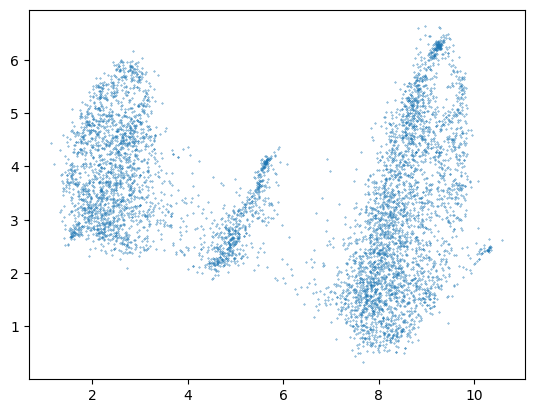

In [4]:
plt.scatter(mapper[:, 0], mapper[:, 1],s=0.1)
plt.savefig('umap_scatter.png')
plt.show()

In [5]:
import hdbscan

hdbscan_labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(mapper)


kmeans_labels = KMeans(n_clusters=3, random_state=10).fit_predict(mapper) ##min clusters depende dos dados, pq?



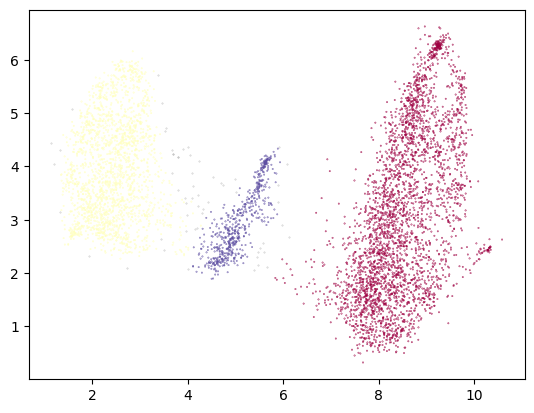

In [8]:
#clustered = (kmeans_labels >= 0)
clustered = (hdbscan_labels >= 0)
labels = hdbscan_labels

plt.scatter(mapper[~clustered, 0],
            mapper[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(mapper[clustered, 0],
            mapper[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral')
plt.savefig("cluster.png")
plt.show()

In [23]:
from slingshot import Slingshot


ZeroDivisionError: float division by zero

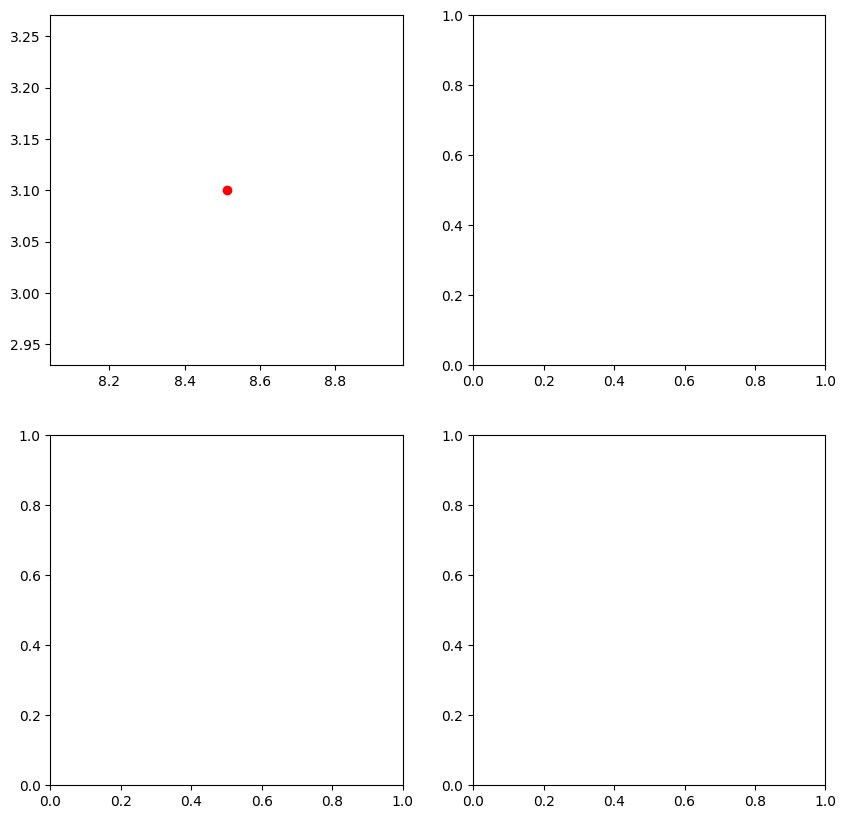

In [25]:
cluster_labels_onehot = np.zeros((labels.shape[0], labels.max()+1))
cluster_labels_onehot[np.arange(labels.shape[0]), labels] = 1

#display(cluster_labels_onehot)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)

slingshot = Slingshot(mapper, cluster_labels_onehot, debug_level='verbose')
slingshot.fit(num_epochs=10, debug_axes=axes)


Number of clusters: 3


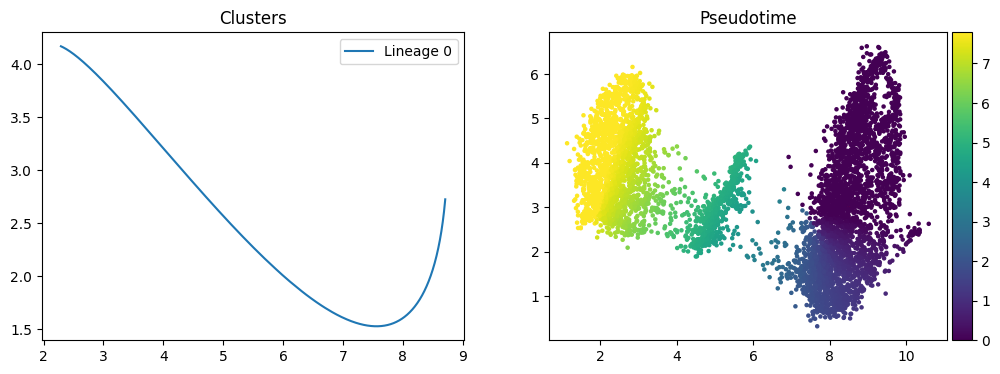

In [19]:

print("Number of clusters: %d" %(slingshot.num_clusters))

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)